### Slade Brooks
##### brooksl@mail.uc.edu
##### 02.17.2023
# AeroComputing Assignment 4

This code

# Part 1

In [47]:
# import shtuff
import matplotlib.pyplot as plt
import numpy as np
import sys

# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part 2

## Part A

In [48]:
# create datasets for problem 15
T = np.array([-250., -200., -100., 0., 100., 300.])
cp = np.array([0.0163, 0.318, 0.699, 0.87, 0.941, 1.04])

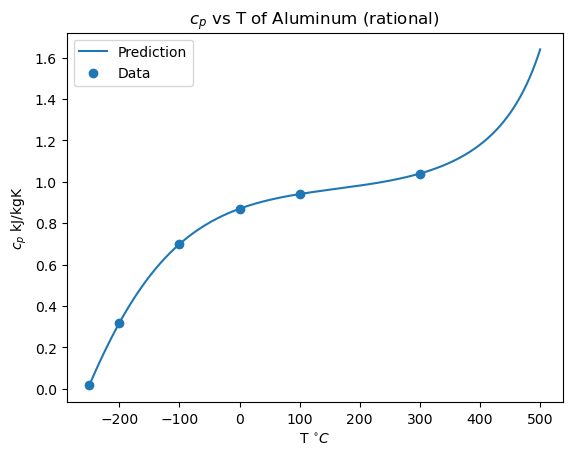

In [49]:
# solve with rational

# create array for vals
cpsr = np.empty(750, dtype="float64")

# set up new T range
Tsr = np.linspace(-250, 500, 750)

# compute val at each T
for i in range(0, len(Tsr)):
    cpsr[i] = pyvot.rational(T.copy(), cp.copy(), Tsr[i])

# plot dat shtuff
plt.plot(Tsr, cpsr, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (rational)")
plt.show()

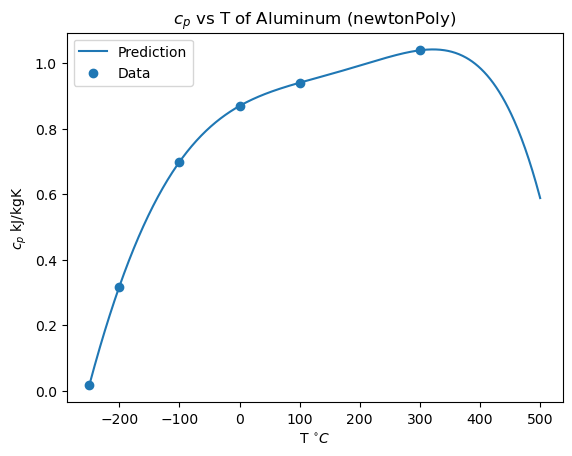

In [50]:
# solve with newtonPoly

# get coefficients of newton's poly
a = pyvot.coeffts(T.copy(), cp.copy())

# create array for vals
cpsN = np.empty(750, dtype="float64")

# set up new T range
TsN = np.linspace(-250, 500, 750)

# compute val at each T
for i in range(0, len(TsN)):
    cpsN[i] = pyvot.evalPoly(a, T.copy(), TsN[i])

# plot dat shtuff
plt.plot(TsN, cpsN, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (newtonPoly)")
plt.show()

## Part B

In [51]:
# create datasets for problem 17
Re = np.array([0.2, 2., 20., 200., 2000., 20000.])
cd = np.array([103., 13.9, 2.72, 0.8, 0.401, 0.433])

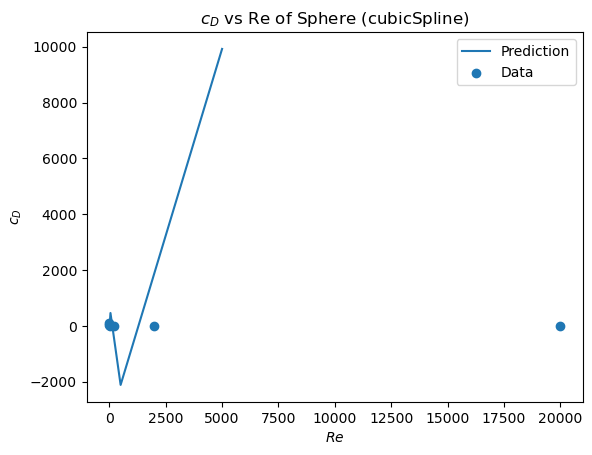

In [52]:
# solve using cubicSpline

# create array for vals
cdsC = np.empty(4, dtype="float64")

# create array for desired study points
ResC = np.array([5., 50., 500., 5000.])

# find out about dem curves
k = pyvot.curvatures(Re.copy(), cd.copy())

# find Cd @ each Re
for i in range(0, len(ResC)):
    cdsC[i] = pyvot.evalSpline(Re.copy(), cd.copy(), k, ResC[i])

# plot dat shtuff
plt.plot(ResC, cdsC, label="Prediction")
plt.scatter(Re, cd, label="Data")
plt.legend()
plt.xlabel("$Re$")
plt.ylabel("$c_{D}$")
plt.title("$c_{D}$ vs Re of Sphere (cubicSpline)")
plt.show()